In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score
import warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
# Suppress all convergence warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [2]:
# Load and preprocess the training data
data_al_spectre_path = r"C:\Users\Asus\Desktop\Projet_ALUM\Al_Spectre_tr.xlsx"
data_al_spectre = pd.read_excel(data_al_spectre_path)
data_al_spectre.columns = data_al_spectre.columns.astype(str)

# Prepare training features and target
X = data_al_spectre.iloc[:, 1:].drop(columns=['Mg'])
y = data_al_spectre['Mg']



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model = Lasso(alpha=1) 
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.071356300108543
R²: 0.9951592101937944


In [9]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X and y are your features and target respectively

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso model
lasso_model = Lasso(alpha=2.028181818181818) 
lasso_model.fit(X_train, y_train)

# Predict on training set
y_train_pred = lasso_model.predict(X_train)

# Predict on test set
y_test_pred = lasso_model.predict(X_test)

# Calculate RMSE and R² for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Calculate RMSE and R² for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R²: {r2_test}")


Training RMSE: 0.035141823330217724
Training R²: 0.9965092936822186
Test RMSE: 0.0723218935158026
Test R²: 0.9950273126434371


In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values
alphas = np.linspace(0.01, 10, 100)  # Generates 100 alpha values from 0.01 to 10

best_params = None
best_score = -float('inf')  # Initialize with negative infinity

for alpha in alphas:
    param_grid = {'alpha': [alpha]}
    grid_search = GridSearchCV(estimator=Lasso(max_iter=10000), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'alpha': 2.028181818181818}


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model = Lasso(max_iter=10000,alpha=2.028181818181818)  # You can adjust alpha as needed
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
y_pred2 = lasso_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.0723218935158026
R²: 0.9950273126434371


In [14]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
coefficients.to_excel('output.xlsx', index=False)



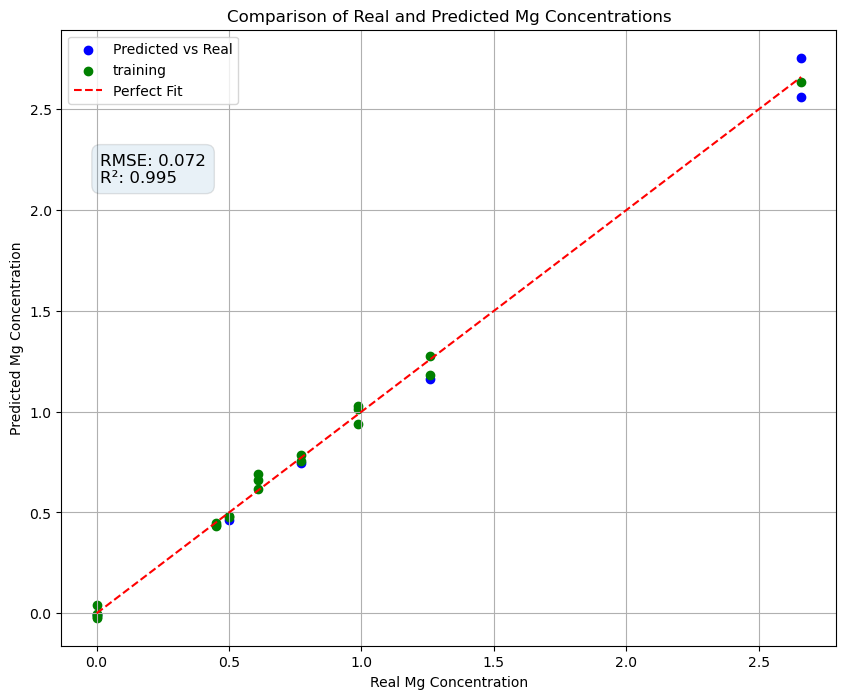

In [11]:
# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real')  
plt.scatter(y_train, y_pred2, color='green', label='training')  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.text(x=0.05, y=0.8, s=f'RMSE: {rmse:.3f}\nR²: {r2:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1))

plt.xlabel('Real Mg Concentration')
plt.ylabel('Predicted Mg Concentration')
plt.title('Comparison of Real and Predicted Mg Concentrations')
plt.legend()
plt.grid(True)
plt.show()